In [113]:
# Required Python Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 
import pdb

# File Paths
INPUT_PATH = "/Users/joh/Desktop/מדמ״ח/Final_Project_Data/splittedData/iphone7/allIphoneData.csv"

In [7]:
# Headers
HEADERS = ["packet_count", "mean_packet_size", "sizevar", "std_fiat", "std_biat", "fpackets", "bpackets", "fbytes", "bbytes", "min_fiat", "min_biat", "max_fiat", "max_biat", "std_fiat", "std_biat", "mean_fiat", "mean_biat", "min_fpkt", "min_bpkt", "max_fpkt", "max_bpkt", "std_fpkt", "std_bpkt", "mean_fpkt", "mean_bpkt","label"]

In [8]:
def read_data(path):
    """
    Read the data into pandas dataframe
    :param path:
    :return:
    """
    data = pd.read_csv(path,sep='\t')
    return data

In [9]:
read_data(INPUT_PATH)

,packet_count,mean_packet_size,sizevar,std_fiat,std_biat,fpackets,bpackets,fbytes,bbytes,min_fiat,...,mean_biat,min_fpkt,min_bpkt,max_fpkt,max_bpkt,std_fpkt,std_bpkt,mean_fpkt,mean_bpkt,label
0,257.0,793.961089,9.651000e+05,0.009874,0.029941,124.0,133.0,12846.0,191202.0,0.0,...,0.005594,66.0,66.0,1454.0,4230.0,181.351427,987.888702,103.596774,1437.609023,1.0
1,182.0,568.505495,5.155909e+05,0.130061,0.033251,98.0,84.0,62614.0,40854.0,0.0,...,0.014155,54.0,54.0,1454.0,3108.0,634.402774,800.827353,638.918367,486.357143,1.0
2,59.0,385.949153,5.752741e+05,0.016535,0.047168,32.0,27.0,8308.0,14463.0,0.0,...,0.026443,54.0,54.0,1454.0,5053.0,380.100135,1033.501814,259.625000,535.666667,1.0
3,60.0,380.350000,3.562085e+05,0.015830,0.048544,33.0,27.0,8362.0,14459.0,0.0,...,0.027074,54.0,54.0,1454.0,2774.0,375.822426,767.477605,253.393939,535.518519,1.0
4,60.0,380.416667,3.562852e+05,0.017377,0.047777,33.0,27.0,8362.0,14463.0,0.0,...,0.026184,54.0,54.0,1454.0,2774.0,375.822426,767.559870,253.393939,535.666667,1.0
5,61.0,375.065574,3.520938e+05,0.014349,0.048367,33.0,28.0,8362.0,14517.0,0.0,...,0.025183,54.0,54.0,1454.0,2774.0,375.822426,758.692075,253.393939,518.464286,1.0
6,446.0,430.928251,3.326968e+05,2.728691,0.064100,226.0,220.0,95764.0,96430.0,0.0,...,0.026004,66.0,66.0,1454.0,2842.0,536.444294,616.654554,423.734513,438.318182,1.0
7,62.0,357.564516,3.374087e+05,0.317280,0.045459,32.0,30.0,7966.0,14203.0,0.0,...,0.025937,54.0,54.0,1454.0,2774.0,372.076383,731.316842,248.937500,473.433333,1.0
8,15885.0,999.453384,1.355726e+06,0.554907,0.005345,7019.0,8866.0,545677.0,15330640.0,0.0,...,0.000709,54.0,66.0,883.0,13417.0,38.090263,1105.817904,77.742841,1729.149560,1.0
9,788.0,928.520305,1.028113e+06,3.574889,0.006581,360.0,428.0,30532.0,701142.0,0.0,...,0.001493,54.0,66.0,460.0,5618.0,61.551961,887.001493,84.811111,1638.182243,1.0


In [10]:
def dataset_statistics(dataset):
    """
    Basic statistics of the dataset
    :param dataset: Pandas dataframe
    :return: None, print the basic statistics of the dataset
    """
    print (dataset.describe())

In [11]:
def handel_missing_values(dataset, missing_values_header, missing_label):
    """
    Filter missing values from the dataset
    :param dataset:
    :param missing_values_header:
    :param missing_label:
    :return:
    """
 
    return dataset[dataset[missing_values_header] != missing_label]

In [12]:
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """
 
    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],train_size=train_percentage)
    return train_x, test_x, train_y, test_y

In [92]:
def random_forest_classifier(features, target, estimators, min_samples_split):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :param estimators:
    :param min_samples_split:
    :return: trained random forest classifier
    """
    max_depth = None
#     min_samples_split=5    
#     estimators = 32
    clf = RandomForestClassifier(n_estimators=estimators, max_depth=max_depth,min_samples_split=min_samples_split)
    clf.fit(features, target)
    return clf

In [105]:
def Decision_TreeClassifier(features, target, max_depth):
    """
    To train the Decision Tree Classifier with features and target data
    :param features:
    :param target:
    :param max_depth:
    :return: trained decision tree classifier
    """
    dtc = DecisionTreeClassifier(max_depth=max_depth)
    dtc.fit(features, target)
    return dtc

In [106]:
def knn_classifier(features, target, neighbors):
    """
    To train the knn classifier with features and target data
    :param features:
    :param target:
    :param neighbors:
    :return: trained knn classifier
    """
    cknn = KNeighborsClassifier(neighbors)
    cknn.fit(features, target)
    return cknn

In [107]:

# Load the csv file into pandas dataframe
dataset = read_data(INPUT_PATH)
# Get basic statistics of the loaded dataset
#dataset_statistics(dataset)

# Filter missing values
#dataset = handel_missing_values(dataset, HEADERS[6], 0.0)
train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, HEADERS[1:-1], HEADERS[-1])

# Train and Test dataset size details
print ("Train_x Shape :: ", train_x.shape)
print ("Train_y Shape :: ", train_y.shape)
print ("Test_x Shape :: ", test_x.shape)
print ("Test_y Shape :: ", test_y.shape)


Train_x Shape ::  (1298, 24)
Train_y Shape ::  (1298,)
Test_x Shape ::  (557, 24)
Test_y Shape ::  (557,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [108]:
from matplotlib.legend_handler import HandlerLine2D

def TrainTestpltShow(values, train_results, test_results, valueName):
    line1, = plt.plot(values, train_results,'b', label="Train Accuracy")
    line2, = plt.plot(values, test_results, 'r', label="Test Accuracy")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('Accuracy')
    plt.xlabel(valueName)
    plt.show()

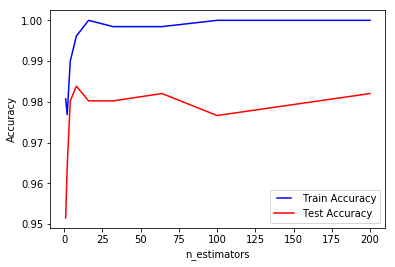

In [109]:
# Create random forest classifier instance
# Accuracy depending to number of estimators.
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
min_sample_split = 5
train_results = []
test_results = []
for n in n_estimators:
    trained_model_rf = random_forest_classifier(train_x, train_y, n, min_sample_split)
    ac_train = accuracy_score(train_y, trained_model_rf.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_rf.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)

TrainTestpltShow(n_estimators, train_results, test_results, "n_estimators")

# predictions = trained_model_rf.predict(test_x)
# for i in range(0, 100):
#     if (i%10 == 0):
#         print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))

# print ("\n")
# print ("Train Accuracy :: ", accuracy_score(train_y, trained_model_rf.predict(train_x)))
# print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
# print (" Confusion matrix ", confusion_matrix(test_y, predictions))

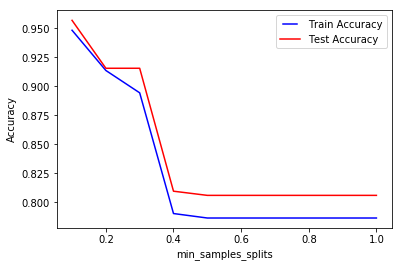

In [110]:
# Create random forest classifier instance
# Accuracy depending to min samples splite value.
n_estimators = 32
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for val in min_samples_splits:
    trained_model_rf = random_forest_classifier(train_x, train_y, n_estimators, val)
    ac_train = accuracy_score(train_y, trained_model_rf.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_rf.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)

TrainTestpltShow(min_samples_splits, train_results, test_results, "min_samples_splits")

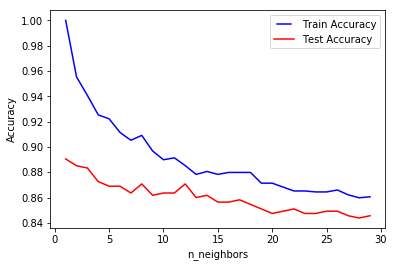

In [86]:
# Create knn classifier instance
# accuracy depending to number of neighbors (1 to 30)
neighbors = list(range(1,30))
train_results = []
test_results = []

for n in neighbors:
    trained_model_knn = knn_classifier(train_x, train_y, n)
    ac_train = accuracy_score(train_y, trained_model_knn.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_knn.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)

TrainTestpltShow(neighbors, train_results, test_results, "n_neighbors")
    
# for i in range(0, 100):
#     if (i%10 == 0):
#         print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))

# print ("\n")
# print ("neighbors :",neighbors)
# print ("Train Accuracy :: ", accuracy_score(train_y, trained_model_knn.predict(train_x)))
# print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
# print (" Confusion matrix ", confusion_matrix(test_y, predictions))

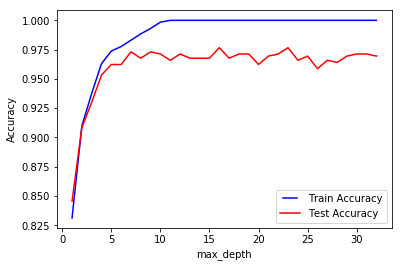

In [114]:
# Create decision tree classifier instance
# accuracy depending to number of neighbors (1 to 30)
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for n in max_depths:
    trained_model_dt = Decision_TreeClassifier(train_x, train_y, n)
    ac_train = accuracy_score(train_y, trained_model_dt.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_dt.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)

TrainTestpltShow(max_depths, train_results, test_results, "max_depth")